<a href="https://colab.research.google.com/github/Samuela31/Deep-Learning-Laboratory/blob/main/DL_Lab_3_Image_Classification_(MNIST_Handwritten_Digits).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/anmolai/mnist-classification-of-digits-accuracy-98

Dataset Loading

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d "hojjatk/mnist-dataset"

 68% 15.0M/22.0M [00:00<00:00, 157MB/s]
100% 22.0M/22.0M [00:00<00:00, 185MB/s]


In [ ]:
!unzip mnist-dataset.zip -d MNIST


Archive:  mnist-dataset.zip
  inflating: MNIST/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte  
  inflating: MNIST/t10k-images.idx3-ubyte  
  inflating: MNIST/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte  
  inflating: MNIST/t10k-labels.idx1-ubyte  
  inflating: MNIST/train-images-idx3-ubyte/train-images-idx3-ubyte  
  inflating: MNIST/train-images.idx3-ubyte  
  inflating: MNIST/train-labels-idx1-ubyte/train-labels-idx1-ubyte  
  inflating: MNIST/train-labels.idx1-ubyte  


In [ ]:
import numpy as np
import struct
from array import array
from os.path  import join

In [ ]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([])
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

Dataset Reading

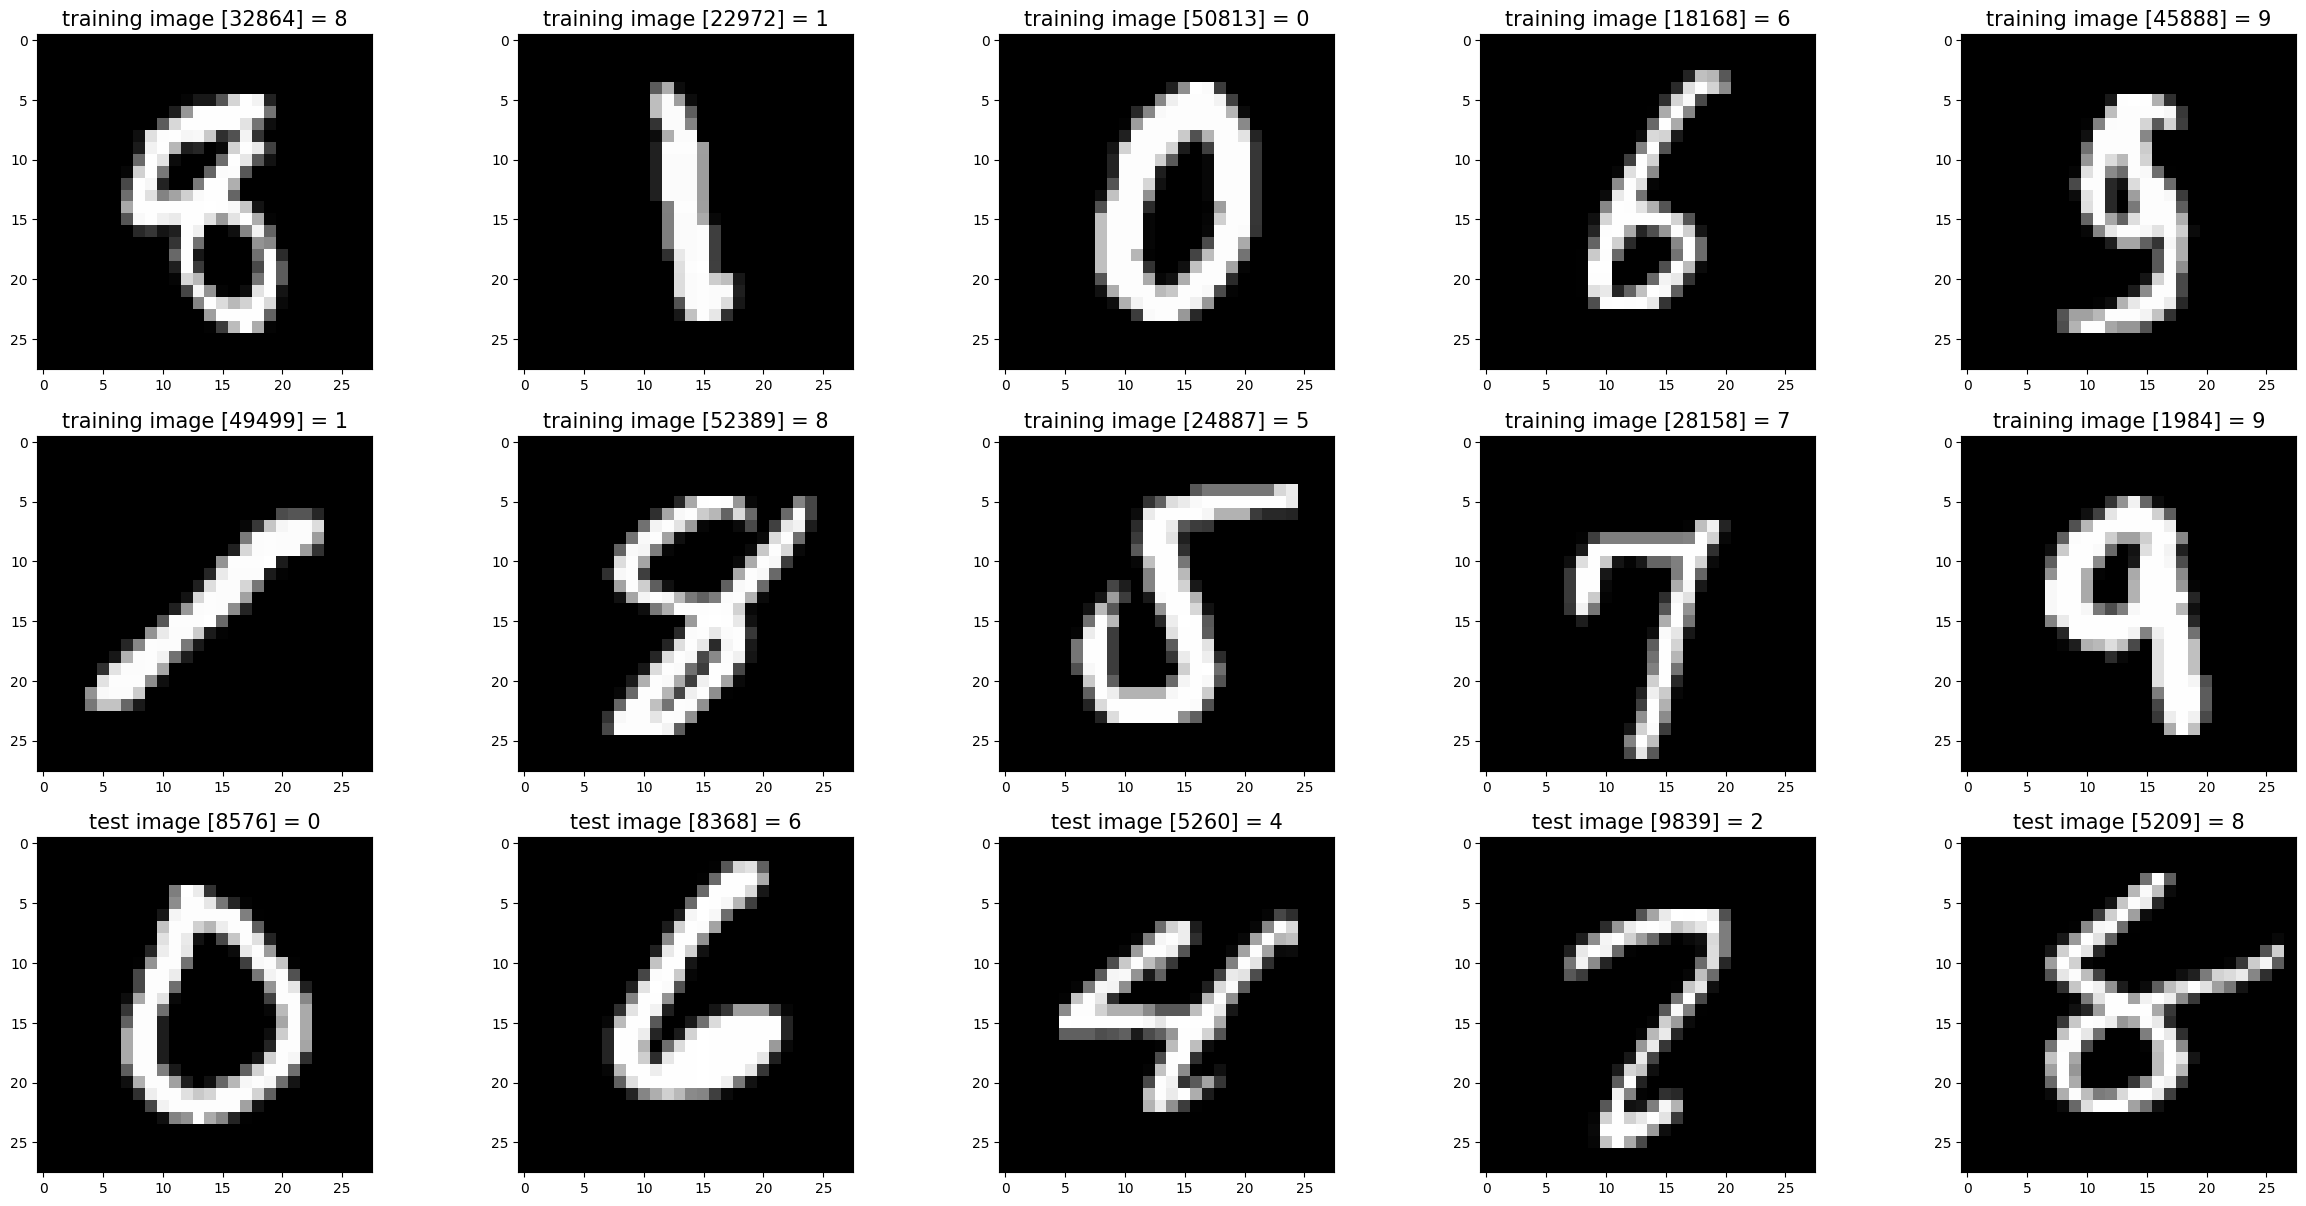

In [ ]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

input_path = './MNIST'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

show_images(images_2_show, titles_2_show)

In [ ]:
print("Training labels:", y_train)
print("Testing labels:", y_test)
print("Training image size:", np.array(x_train[0]).shape)
print("Testing image size:", np.array(x_test[0]).shape)
print("Training images:",len(x_train))
print("Testing images:",len(x_test))

Training labels: array('B', [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8, 3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5, 2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6, 3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7, 9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9, 6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8, 7, 6, 0, 9, 7, 5, 7, 2, 1, 1, 6, 8, 9, 4, 1, 5, 2, 2, 9, 0, 3, 9, 6,

Preprocessing

In [ ]:
import numpy as np

# Convert the list of images to a NumPy array
X_train = np.array(x_train)
X_test = np.array(x_test)

# Ensure data type is float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Dividing by 255 is a common technique for normalizing pixel values in image data. In the context of images represented as pixel values, each pixel typically ranges from 0 to 255 in an 8-bit representation. This means that the minimum pixel value is 0 (representing black), and the maximum pixel value is 255 (representing white).

Normalization involves scaling the pixel values to a standard range, often [0, 1] or [-1, 1]. Dividing each pixel value by 255 accomplishes this scaling, resulting in pixel values that fall within the range [0, 1].

In [ ]:
X_train = [image / 255.0 for image in X_train]
X_test = [image / 255.0 for image in X_test]

In [ ]:
print(X_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
# We need to reshape our train_data to be of shape (samples, height, width, channels)
# to pass to Conv2D layer of keras

final_x_train = np.array(X_train).reshape(60000, 28, 28, 1)
final_x_test = np.array(X_test).reshape(10000, 28, 28, 1)

 When using a neural network with a categorical crossentropy loss function (commonly used for classification tasks), you may want to convert your labels to a format known as "one-hot encoding." One-hot encoding represents each label as a binary vector with a 1 at the index corresponding to the class and 0s elsewhere.

In [ ]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)


In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


CNN using Keras Sequential Model



*   **model = Sequential():** This line creates a sequential model. In Keras, a sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
*   **Conv2D:** This layer represents a 2D convolutional layer. It is commonly used for image processing tasks. The first argument (64 or 32) represents the number of filters or kernels, the kernel_size specifies the size of the filters, and the activation parameter sets the activation function (in this case, ReLU).



* The first convolutional layer (Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) expects input images of shape (28, 28, 1) and applies 64 filters of size 3x3. It uses the ReLU activation function. The input shape corresponds to grayscale images with dimensions 28x28.

* The second convolutional layer (Conv2D(32, kernel_size=3, activation='relu')) has no specified input shape because it automatically takes the output shape from the previous layer. It applies 32 filters of size 3x3 with ReLU activation.



*   **Flatten:** This layer flattens the input, transforming it into a one-dimensional array. It is typically used before fully connected layers.
*   **Dense:** This layer represents a fully connected layer. The first argument (10) represents the number of neurons in the layer, and activation='softmax' specifies the softmax activation function, commonly used for multi-class classification problems. The output layer has 10 neurons, corresponding to the number of classes (assuming this is a classification task).



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                184330    
                                                                 
Total params: 203434 (794.66 KB)
Trainable params: 203434 (794.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
results = model.fit(final_x_train, y_train_one_hot, validation_split = 0.2, epochs=4, batch_size=250)

Epoch 1/4
192/192 [==============================] - 107s 555ms/step - loss: 0.2980 - accuracy: 0.9144 - val_loss: 0.0997 - val_accuracy: 0.9718
Epoch 2/4
192/192 [==============================] - 110s 573ms/step - loss: 0.0820 - accuracy: 0.9768 - val_loss: 0.0696 - val_accuracy: 0.9794
Epoch 3/4
192/192 [==============================] - 105s 547ms/step - loss: 0.0548 - accuracy: 0.9835 - val_loss: 0.0622 - val_accuracy: 0.9821
Epoch 4/4
192/192 [==============================] - 106s 552ms/step - loss: 0.0412 - accuracy: 0.9875 - val_loss: 0.0602 - val_accuracy: 0.9837


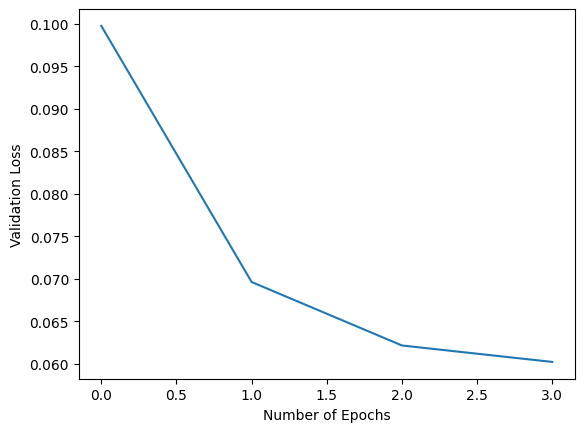

In [ ]:
results.history.keys()
plt.plot(range(len(results.history['val_loss'])), results.history['val_loss'])
plt.ylabel("Validation Loss")
plt.xlabel("Number of Epochs")
plt.show()

In [ ]:
import pandas as pd

plot = pd.DataFrame()
plot['Validation Accuracy'] = model.history.history['val_accuracy']
plot['Training Accuracy'] = model.history.history['accuracy']
plot['Validation Loss'] = model.history.history['val_loss']
plot['Training Loss'] = model.history.history['loss']
plot['Epoch'] = plot.reset_index()['index']+1
plot

,Validation Accuracy,Training Accuracy,Validation Loss,Training Loss,Epoch
0,0.971750,0.914417,0.099736,0.297965,1
1,0.979417,0.976792,0.069623,0.081954,2
2,0.982083,0.983521,0.062160,0.054791,3
3,0.983667,0.987521,0.060226,0.041212,4


In [ ]:
predicted_labels_train = model.predict(final_x_train)

loss,acc = model.evaluate(final_x_train, y_train_one_hot,verbose=0)
print('Train accuracy is ', acc*100, '%')


1875/1875 [==============================] - 39s 21ms/step
Train accuracy is  98.99333119392395 %


Testing

In [ ]:
loss,acc = model.evaluate(final_x_test, y_test_one_hot,verbose=0)
print('Test accuracy is ', acc*100, '%')

Test accuracy is  98.43999743461609 %


1/1 [==============================] - 0s 29ms/step


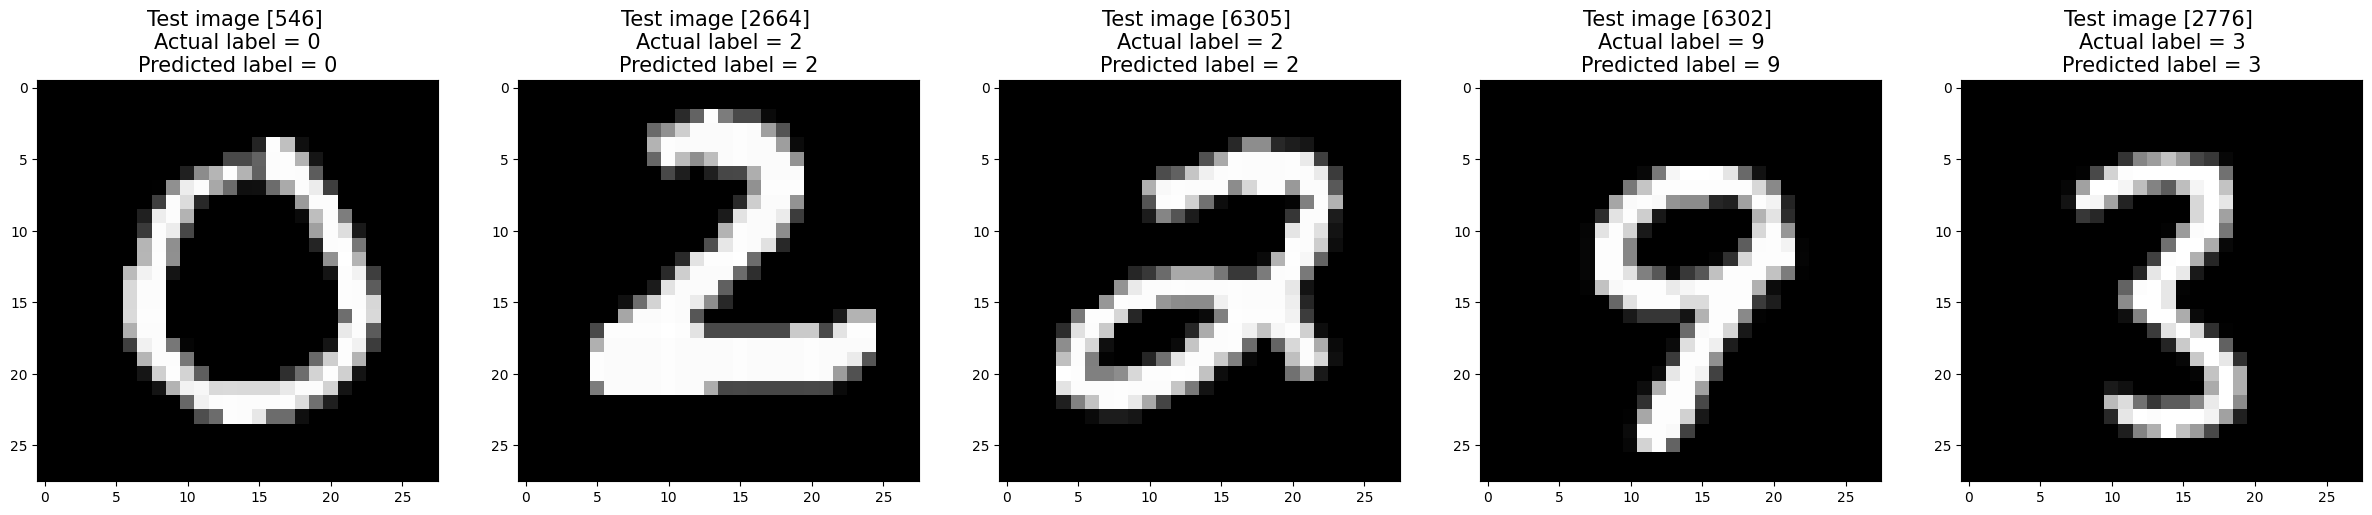

In [ ]:
test_images = []
titles = []

for i in range(0, 5):
    r = random.randint(1, 10000)
    sample_to_predict = final_x_test[r:r+1]  # Create a batch with a single sample, without batch it doesn't work
    predicted_label = model.predict(sample_to_predict)

    test_images.append(x_test[r])
    titles.append('Test image [' + str(r) + '] \nActual label = ' + str(y_test[r]) + '\nPredicted label = ' + str(np.argmax(predicted_label)))

show_images(test_images, titles)
